# Hopfield Network
A Hopfield network has one layer of $N$ neurons and is a fully interconnected recurrent neural network: each neuron is connected to every other neuron. After initialization of all neurons (the initial input), the network is let to evolve: an output at time $t$ becomes an input at time $t+1$. Thus to generate a series of outputs, we have to provide only one initial input. In the course of this dynamical evolution the network should reach a stable state (an attractor), which is a configuration of neuron values that is not changed by subsequent updates of the network. Networks of this kind are used as models of associative memory. After initialization the network should evolve to the closest attractor.

## Colab Setup
This part is only required when running this notebook "in the cloud" on [Google Colab](https://colab.research.google.com). When running it locally, skip this part and go to the next section.

### [OPTIONAL] Interactive Plots
Run the below cell if you want to enable interactive plots in Google Colab. For most exercises this is not required and it can be quite slow.

In [ ]:
!pip install ipympl
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

### [REQUIRED] Auxiliary Files

In [ ]:
# Retrieve some auxiliary files from github
!wget https://raw.githubusercontent.com/KULasagna/ANN_DL_public/master/session2/hopfield.py

## Setup
Import all the necessary modules used throughout this notebook and define some methods to visualize the state space of 2D and 3D Hopfield networks, the energy evolution and the handwritten digits.

In [69]:
# Import the required modules for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from keras.datasets import mnist
from lab2_hopfield import HopfieldNetwork

rng = np.random.default_rng()

In [6]:
# 2D and 3D Hopfield networks:
def plot_targets(targets):
  N = targets.shape[1]
  fig, ax = plt.subplots(subplot_kw={'projection': '3d' if N == 3 else None})
  ax.scatter(*np.swapaxes(targets, 0, 1), color='y', marker='D', label='Targets')
  ax.set_xlim([-1.05, 1.05])
  ax.set_ylim([-1.05, 1.05])
  ax.set_zlim([-1.05, 1.05]) if N == 3 else None
  ax.set_title(f'Targets of a {N}D Hopfield network')
  plt.tight_layout()
  plt.show()

def plot_states(states, filename=None):
  if states.ndim == 2:
    states = np.expand_dims(states, 0)
  N = states.shape[1]
  fig, ax = plt.subplots(subplot_kw={'projection': '3d' if N == 3 else None})
  createLineCollection = Line3DCollection if N == 3 else LineCollection
  evolution = createLineCollection(np.swapaxes(states, 1, 2), color='b', zorder=0, label='State Evolution')
  ax.add_collection(evolution)
  s_init = states[:, :, 0]
  s_final = states[:, :, -1]
  ax.scatter(*np.swapaxes(s_init, 0, 1), color='g', marker='*', label='Initial State')
  ax.scatter(*np.swapaxes(s_final, 0, 1), color='r', marker='x', label='Final State')

  ax.set_xlim([-1.05, 1.05])
  ax.set_ylim([-1.05, 1.05])
  ax.set_zlim([-1.05, 1.05]) if N == 3 else None
  ax.set_title(f'Time evolution in the state space of a {N}D Hopfield network')
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), ncols=4)

  plt.tight_layout()
  if filename is not None:
    plt.savefig(f"{filename}.svg")
  plt.show()

def plot_energies(energies, filename=None):
  if energies.ndim == 1:
    energies = np.expand_dims(energies, 0)
  fig, ax = plt.subplots()
  ax.plot(energies.T)

  ax.set_title('Energy evolution of the states')

  plt.tight_layout()
  if filename is not None:
    plt.savefig(f"{filename}.svg")
  plt.show()

# Digit reconstruction:
def plot_digits(digits, titles=None, filename=None):
  digits = np.asarray(digits)
  C, R = [1, 1, *digits.shape[:-1]][-2:]
  if titles is None:
    titles = [None]*C
  digits = digits.reshape((C, R, 28, 28))
  fig, axes = plt.subplots(R, C, squeeze=False, gridspec_kw={'wspace':1, 'hspace':0.05})
  for c, title in enumerate(titles):
    if title is not None:
      axes[0, c].set_title(title)
    for r in range(R):
      axes[r, c].imshow(digits[c, r], cmap='binary', vmin=-1, vmax=1)
      axes[r, c].axis('off')
  if filename is not None:
    plt.savefig(f'{filename}.svg')
  plt.show()

## 2D Hopfield Network

Create a 2D Hopfield network with target patterns $[1, 1]$, $[-1, -1]$ and $[1, -1]$.

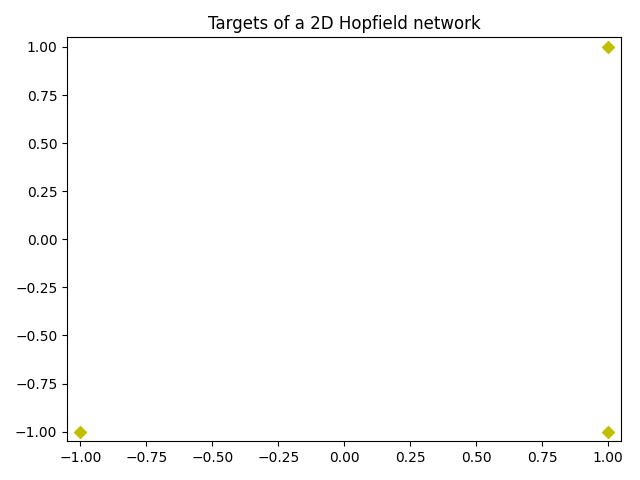

In [7]:
"""
Create a Hopfield network with target patterns [1, 1], [−1, −1] and [1, −1] and the corresponding number of neurons. 
Simulate the state evolution for various input vectors (e.g. random points or points of high symmetry) 
and note down the obtained attractors after a sufficient number of iterations. 
Are the real attractors the same as those used to create the network? 
If not, why do we get these unwanted attractors? How many iterations does it typically take to reach the attractor? 
What can you say about the stability of the attractors?

"""
# Create the Hopfield network with the specified target patterns
targets = np.array([[1, 1], [-1, -1], [1, -1]])
net = HopfieldNetwork(targets)

# Plot the target patterns
plot_targets(targets)

### **Exercise 1**
Simulate the state evolution for various input vectors (e.g. random points or points of high symmetry) and note down the obtained attractors after a sufficient number of iterations.

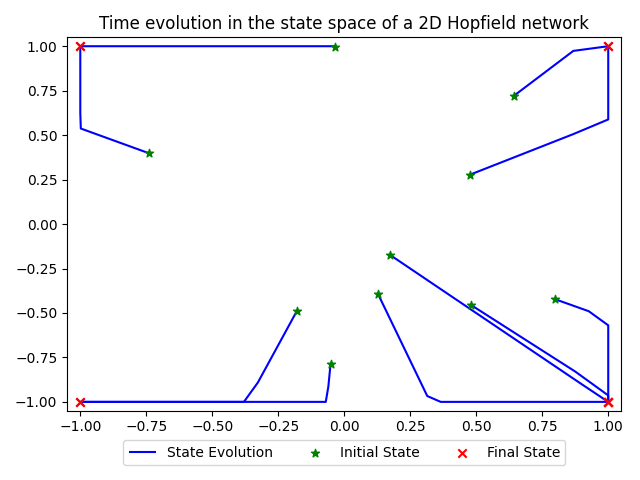

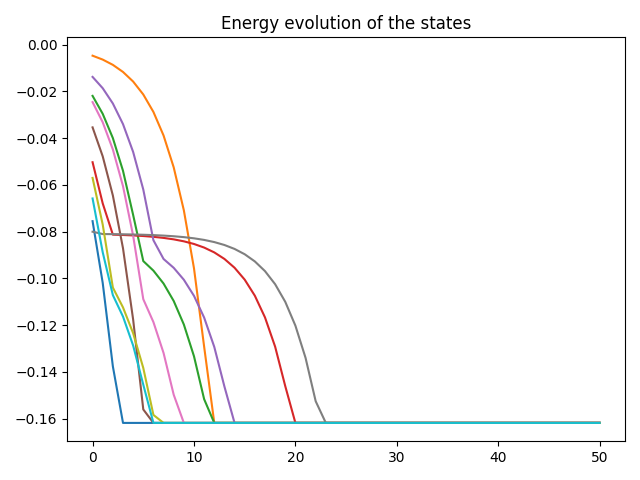

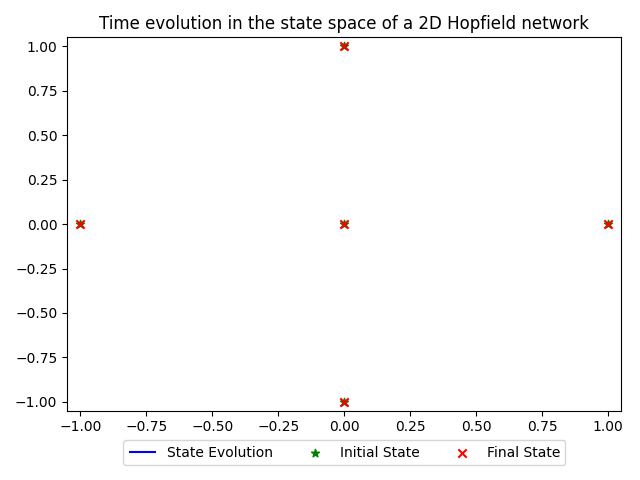

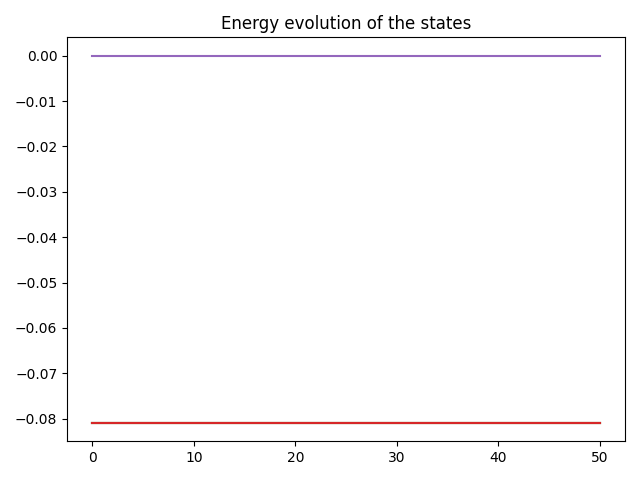

In [8]:
# Random inputs:
random_inputs = 2*rng.uniform(size=(10, 2))-1  # rng.uniform returns random numbers between 0 and 1, so rescale it to the interval [-1,1]
random_states, random_energies = net.simulate(random_inputs, num_iter=50)
plot_states(random_states, "state_evolution_in_hopfield_network_random")
plot_energies(random_energies, "energy_over_tterations_random")

# Symmetric inputs:
symmetric_inputs = np.array([[1, 0], [0, 1], [-1, 0], [0, -1], [0, 0]])
symmetric_states, symmetric_energies = net.simulate(symmetric_inputs, num_iter=50)
plot_states(symmetric_states, "state_evolution_in_hopfield_network_symmetric")
plot_energies(symmetric_energies, "energy_over_tterations_symmetric")


#### **Exercise 1.a:**
Are the real attractors the same as those used to create the network? If not, why do we get these unwanted attractors?

In [9]:
# Compare obtained attractors with targets and print the results
"""
The code will output the final states (attractors) for both random and symmetric inputs and compare these to the target patterns used to train the Hopfield network.
"""
print("Random Inputs: Attractors vs. Targets")
for i, final_state in enumerate(random_states[:, :, -1]):
    print(f"Simulation {i+1} - Final state: {final_state}, Target: {net.tf(targets)}")

print("\nSymmetric Inputs: Attractors vs. Targets")
for i, final_state in enumerate(symmetric_states[:, :, -1]):
    print(f"Symmetric Simulation {i+1} - Final state: {final_state}, Target: {net.tf(targets)}")



Random Inputs: Attractors vs. Targets
Simulation 1 - Final state: [1. 1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 2 - Final state: [ 1. -1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 3 - Final state: [-1. -1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 4 - Final state: [-1. -1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 5 - Final state: [ 1. -1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 6 - Final state: [ 1. -1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 7 - Final state: [1. 1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 8 - Final state: [-1.  1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 9 - Final state: [-1.  1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Simulation 10 - Final state: [ 1. -1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]

Symmetric Inputs: Attractors vs. Targets
Symmetric Simulation 1 - Final state: [1. 0.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Symmetric Simulation 2 - Final state: [0. 1.], Target: [[ 1  1]
 [-1 -1]
 [ 1 -1]]
Symmetr

#### **Exercise 1.b:**
How many iterations does it typically take to reach the attractor?

In [10]:
def find_attractor_convergence(states, targets):
    """
    Determines when each simulation reaches an attractor by checking when states stop changing.
    
    Parameters:
        states (np.ndarray): Array of shape (num_simulations, num_neurons, num_iterations) containing state history.
        targets (np.ndarray): Array of target patterns used to train the network, of shape (num_targets, num_neurons).
        
    Returns:
        List of convergence iteration counts for each simulation.
    """
    convergence_iterations = []

    # Transpose targets for easier comparison
    targets_t = targets.T

    for simulation in states:
        for iteration in range(states.shape[-1] - 1):
            current_state = simulation[:, iteration]
            # Expand dims of current_state for comparison
            expanded_state = np.expand_dims(current_state, axis=1)
            
            # Compare to each target pattern individually
            if any(np.all(np.isclose(expanded_state, target, atol=1e-3)) for target in targets_t):
                convergence_iterations.append(iteration)
                break
            elif np.allclose(simulation[:, iteration], simulation[:, iteration + 1], atol=1e-3):
                convergence_iterations.append(iteration)
                break
        else:
            # If state never converges, append the maximum number of iterations
            convergence_iterations.append(states.shape[-1] - 1)
    
    return convergence_iterations


# Using the function to determine convergence for random and symmetric inputs
random_convergence_iterations = find_attractor_convergence(random_states, targets)
symmetric_convergence_iterations = find_attractor_convergence(symmetric_states, targets)

# Print the average number of iterations to reach an attractor
print("Average number of iterations to reach an attractor (Random Inputs):", np.mean(random_convergence_iterations))
print("Average number of iterations to reach an attractor (Symmetric Inputs):", np.mean(symmetric_convergence_iterations))


Average number of iterations to reach an attractor (Random Inputs): 11.2
Average number of iterations to reach an attractor (Symmetric Inputs): 0.0


#### **Exercise 1.c:**
What can you say about the stability of the attractors?

In [11]:
def test_attractor_stability(network, targets, perturbation_strength=0.1, num_iter=50):
    """
    Tests the stability of attractors in a Hopfield network by introducing a small perturbation
    and checking if the network converges back to the original attractor.
    For each target pattern (attractor), it creates a slightly perturbed version by adding Gaussian noise scaled by perturbation_strength
    Parameters:
        network (HopfieldNetwork): The Hopfield network instance.
        targets (np.ndarray): The target patterns used as attractors, shape (num_targets, num_neurons).
        perturbation_strength (float): The magnitude of the perturbation to apply to each attractor.
        num_iter (int): Number of iterations for the network simulation.

    Returns:
        A list indicating whether each attractor is stable (True) or not (False).
    """
    stability_results = []

    for target in targets:
        # Introduce a small perturbation to the target pattern
        perturbation = perturbation_strength * network.rng.normal(size=target.shape)
        perturbed_target = np.clip(target + perturbation, -1, 1)  # Ensure perturbed state is within bounds

        # Simulate the network starting from the perturbed state
        perturbed_states, _ = network.simulate(perturbed_target, num_iter=num_iter)

        # Check if the final state is close to the original target pattern
        final_state = perturbed_states[:, -1]
        is_stable = np.allclose(final_state, target, atol=0.1)

        stability_results.append(is_stable)

    return stability_results

# Example usage:
targets = np.array([[1, 1], [-1, -1], [1, -1]])  # Assuming these are your normalized target patterns
net = HopfieldNetwork(targets)  # Assuming your network is already created and trained with these targets

stability_results = test_attractor_stability(net, targets, perturbation_strength=0.1, num_iter=50)
for i, is_stable in enumerate(stability_results):
    print(f"Attractor {i+1} ({targets[i]}): {'Stable' if is_stable else 'Unstable'}")


Attractor 1 ([1 1]): Stable
Attractor 2 ([-1 -1]): Stable
Attractor 3 ([ 1 -1]): Stable


## 3D Hopfield Network

Create a 3D Hopfield network with target patterns $[1, 1, 1]$, $[-1, -1, 1]$ and $[1, -1, -1]$.

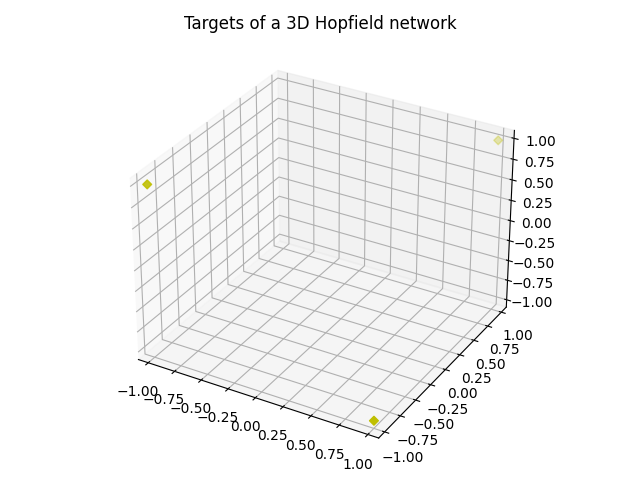

In [14]:
targets = np.array([[1, 1, 1], [-1, -1, 1], [1, -1, -1]])
net = HopfieldNetwork(targets)
plot_targets(targets)

### **Exercise 2**
Simulate the state evolution for various input vectors (e.g. random points or points of high symmetry) and note down the obtained attractors after a sufficient number of iterations.

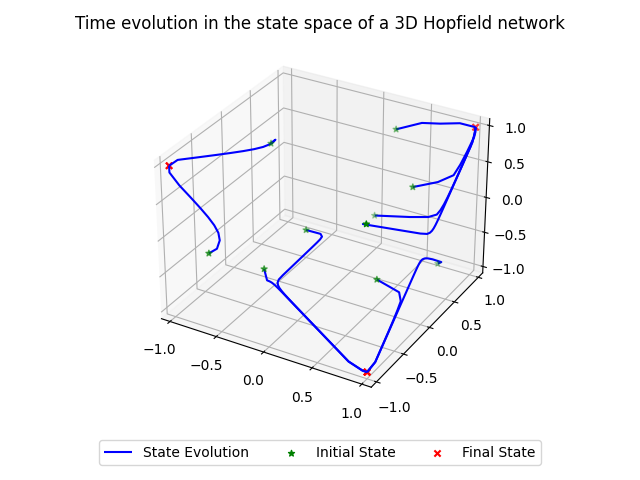

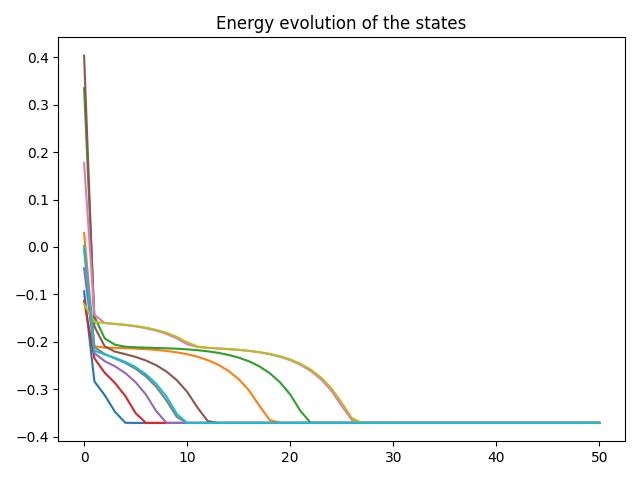

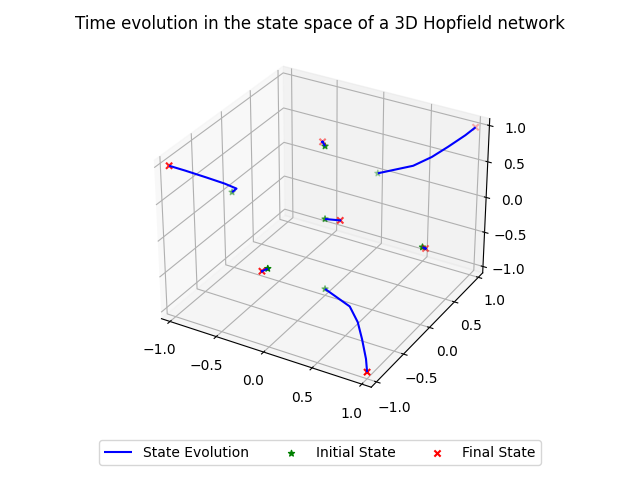

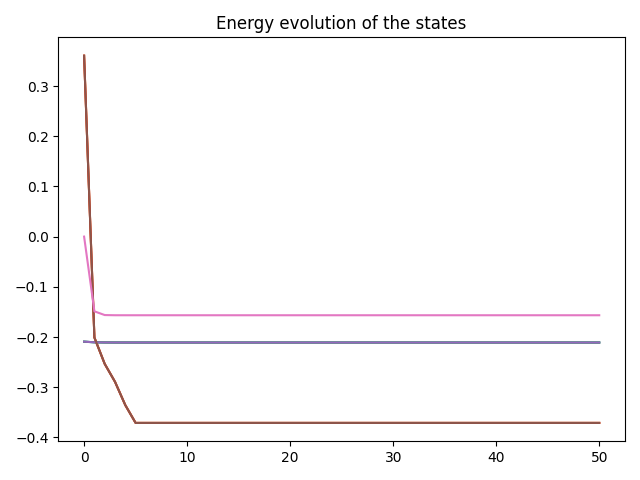

In [15]:
# Random inputs:
random_inputs = 2*rng.uniform(size=(10, 3))-1  # rng.uniform returns random numbers between 0 and 1, so rescale it to the interval [-1,1]
random_states, random_energies = net.simulate(random_inputs, num_iter=50)
plot_states(random_states, "hopfield3D_random")  # Second parameter is the filename of the generated image
plot_energies(random_energies, "energy3D_random")

# Symmetric inputs:
symmetric_inputs = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [-1, 0, 0], [0, -1, 0], [0, 0, -1], [0, 0, 0]])
symmetric_states, symmetric_energies = net.simulate(symmetric_inputs, num_iter=50)
plot_states(symmetric_states, "hopfield3D_symmetric")  # Second parameter is the filename of the generated image
plot_energies(symmetric_energies, "energy3D_symmetric")



#### **Exercise 2.a:**
Are the real attractors the same as those used to create the network? If not, why do we get these unwanted attractors?

In [16]:
# Compare obtained attractors with targets and print the results
"""
The code will output the final states (attractors) for both random and symmetric inputs and compare these to the target patterns used to train the Hopfield network.
"""
for i, final_state in enumerate(random_states[:, :, -1]):
    print(f"Simulation {i+1} - Final state: {final_state}, Target: {net.tf(targets)}")
    
for i, final_state in enumerate(symmetric_states[:, :, -1]):
    print(f"Symmetric Simulation {i+1} - Final state: {final_state}, Target: {net.tf(targets)}")


Simulation 1 - Final state: [1. 1. 1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 2 - Final state: [ 1. -1. -1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 3 - Final state: [ 1. -1. -1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 4 - Final state: [1. 1. 1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 5 - Final state: [ 1. -1. -1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 6 - Final state: [1. 1. 1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 7 - Final state: [ 1. -1. -1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 8 - Final state: [-1. -1.  1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 9 - Final state: [1. 1. 1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Simulation 10 - Final state: [-1. -1.  1.], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Symmetric Simulation 1 - Final state: [ 1.          0.06045472 -0.06045472], Target: [[ 1  1  1]
 [-1 -1  1]
 [ 1 -1 -1]]
Symmetric

#### **Exercise 2.b:**
How many iterations does it typically take to reach the attractor?

In [17]:
# determine number of iterations to reach the attractors
# Using the function to determine convergence for random and symmetric inputs
random_convergence_iterations = find_attractor_convergence(random_states, targets)
symmetric_convergence_iterations = find_attractor_convergence(symmetric_states, targets)

# Print the average number of iterations to reach an attractor
print("Average number of iterations to reach an attractor (Random Inputs):", np.mean(random_convergence_iterations))
print("Average number of iterations to reach an attractor (Symmetric Inputs):", np.mean(symmetric_convergence_iterations))


Average number of iterations to reach an attractor (Random Inputs): 14.7
Average number of iterations to reach an attractor (Symmetric Inputs): 5.285714285714286


#### **Exercise 2.c:**
What can you say about the stability of the attractors?

In [18]:
# examine stability of attractors
targets = np.array([[1, 1, 1], [-1, -1, 1], [1, -1, -1]])
net = HopfieldNetwork(targets)

stability_results = test_attractor_stability(net, targets, perturbation_strength=0.1, num_iter=50)
for i, is_stable in enumerate(stability_results):
    print(f"Attractor {i+1} ({targets[i]}): {'Stable' if is_stable else 'Unstable'}")
    

Attractor 1 ([1 1 1]): Stable
Attractor 2 ([-1 -1  1]): Stable
Attractor 3 ([ 1 -1 -1]): Stable


## Digit Reconstruction

We will now train a higher dimensional Hopfield network which has as attractors the handwritten digits from 0 to 9, and test its ability to correctly reconstruct noisy variants of those digits.

We start by loading and preprocessing the MNIST dataset of handwritten digits.

In [19]:
(digits, labels), _ = mnist.load_data()               # Load MNIST digits dataset
digits = {d: digits[labels == d] for d in range(10)}  # Store digits by class label
targets = [digits[d][0] for d in range(10)]           # Select one digit of each class as a target pattern for the Hopfield network
targets, params = HopfieldNetwork.normalize(targets)  # Normalize the targets (rescaling to the interval [-1, 1])

Create the Hopfield network and visualize its target attractors.

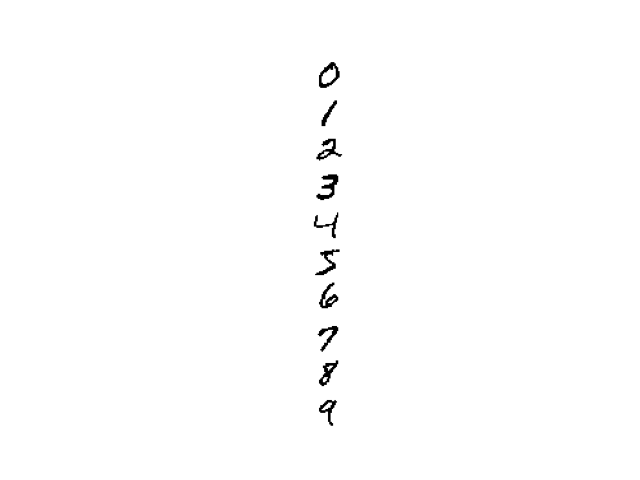

In [22]:
net = HopfieldNetwork(targets)
plot_digits(targets)



### **Exercise 3**
Add some random noise to the digits and check whether the network is able to recover the original digits. Is the Hopfield model always able to reconstruct the noisy digits? If not, why? What is the influence of the noise on the number of iterations?

Try to answer the above questions by playing with these two parameters.

In [79]:
# @title { run: "auto" }

# Standard deviation of the added Gaussian noise
noise_level = 5 # @param {type:"slider", min:0, max:10, step:0.1}
# Number of iterations
num_iter = 50 # @param {type:"slider", min:1, max:100, step:1}

In [80]:
digits_noisy = np.clip(targets + rng.normal(scale=noise_level, size=targets.shape), -1, 1)
states, energies = net.simulate(digits_noisy, num_iter)

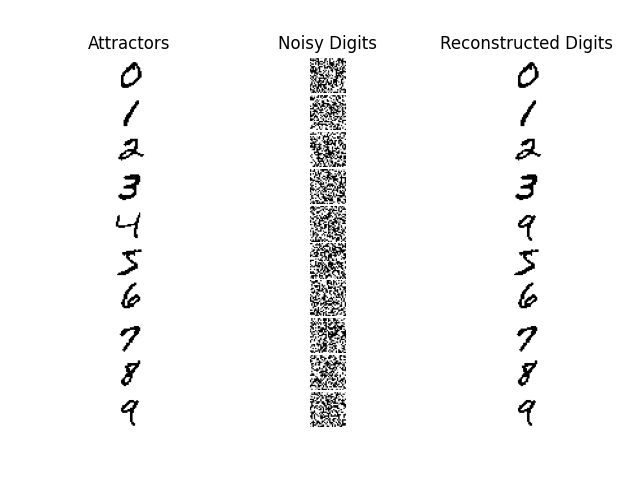

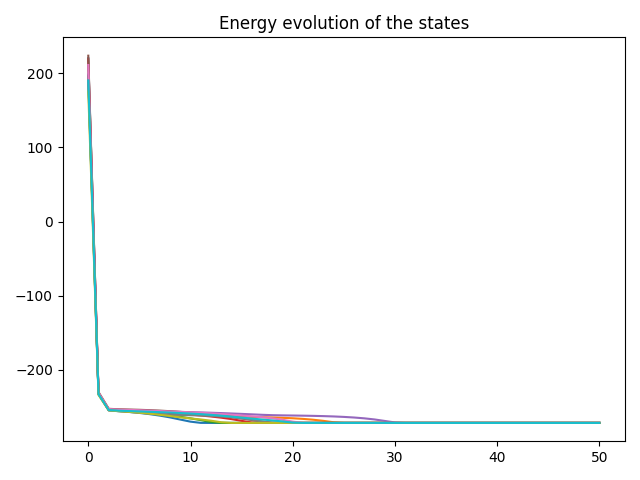

In [81]:
plot_digits([targets, digits_noisy, states[:,:,-1]], ["Attractors", "Noisy Digits", "Reconstructed Digits"], "digits")
plot_energies(energies, "digits_energy")

In [78]:
#iterate though all noise levels and store the results comparing the reconstructed digits with the original ones
# noise levels from 0 to 10 with step 0.1
noise_levels = np.arange(0, 10.1, 0.1)
results = []

for noise_level in noise_levels:
    digits_noisy = np.clip(targets + rng.normal(scale=noise_level, size=targets.shape), -1, 1)
    states, _ = net.simulate(digits_noisy, num_iter)
    results.append(states[:, :, -1])
    
results = np.array(results)
# compute the hopfield network's accuracy for each noise level. accuracy is computed as the number of correctly reconstructed digits divided by the total number of digits
# for each noise level, compute the accuracy among the ten digits
accuracies = []
for i, noise_level in enumerate(noise_levels):
    correct = np.sum(np.all(np.isclose(results[i], targets, atol=0.1), axis=1))
    accuracies.append(correct / len(targets) * 100)
    
# put into table
df = pd.DataFrame(data={"Noise Level": noise_levels, "Accuracy (%)": accuracies})
print(df)


     Noise Level  Accuracy (%)
0            0.0         100.0
1            0.1         100.0
2            0.2         100.0
3            0.3         100.0
4            0.4         100.0
..           ...           ...
96           9.6          50.0
97           9.7          30.0
98           9.8          80.0
99           9.9          30.0
100         10.0          40.0

[101 rows x 2 columns]


## Extra
Some additional things you can experiment with (not necessary for the report):


*   The default learning algorithm to setup the Hopfield networks is more complex than the Hebbian rule from the lecture slides. By passing `"Hebb"` as the second parameter when creating the networks, you can see the difference between both learning algorithms.
*   The default simulation algorithm used by the Hopfield networks updates the neurons in synchronous mode. By passing `sync=False` as the third parameter to the `simulate` method, you can experiment with asynchronous updates of the neurons.
*   Instead of adding noise, you can try to pass some alternative digits (not used as training patterns) as initial states to the network; or try to occlude specific parts of the input images.
*   You can experiment with other keras datasets, have a look at the different [available datasets](https://keras.io/api/datasets/).



In [ ]:
net = HopfieldNetwork(targets, "Hebb")
plot_digits(targets)

# @title { run: "auto" }

# Standard deviation of the added Gaussian noise
noise_level = 5 # @param {type:"slider", min:0, max:10, step:0.1}
# Number of iterations
num_iter = 50 # @param {type:"slider", min:1, max:100, step:1}

digits_noisy = np.clip(targets + rng.normal(scale=noise_level, size=targets.shape), -1, 1)
states, energies = net.simulate(digits_noisy, num_iter)

plot_digits([targets, digits_noisy, states[:,:,-1]], ["Attractors", "Noisy Digits", "Reconstructed Digits"], "digits")
plot_energies(energies, "digits_energy")